## 📘 **Topic 5: Multiple Linear Regression**

---

### 🧠 What is it?

**Multiple Linear Regression** extends **Simple Linear Regression** to **multiple input features**.

Instead of:

$$
\hat{Y} = mX + b
$$

We now have:

$$
\hat{Y} = w_1 X_1 + w_2 X_2 + \dots + w_n X_n + b
$$

Or in vector form:

$$
\hat{Y} = \mathbf{w}^T \mathbf{X} + b
$$

Where:

* $X_1, X_2, \dots, X_n$ are the input features
* $w_1, w_2, \dots, w_n$ are the weights (slopes)
* $b$ is the bias/intercept
* $\hat{Y}$ is the predicted output

---

### 🔧 Example:

Let’s say we want to predict **house price** based on:

* **Size (sq ft)**
* **Number of bedrooms**

$$
\hat{Y} = w_1 \cdot \text{Size} + w_2 \cdot \text{Bedrooms} + b
$$

---

### 🧪 Python Example using `scikit-learn`:

```python
import numpy as np
from sklearn.linear_model import LinearRegression

# Input features: [Size (sqft), Bedrooms]
X = np.array([
    [1000, 2],
    [1500, 3],
    [2000, 4],
    [2500, 4],
    [3000, 5]
])

# Target: House Price
Y = np.array([200000, 300000, 400000, 450000, 500000])

# Model
model = LinearRegression()
model.fit(X, Y)

# Coefficients (weights)
print("Weights (w1, w2):", model.coef_)
print("Intercept (b):", model.intercept_)

# Prediction for a new house
new_house = np.array([[2200, 3]])
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])
```

---

### 🎯 What does the model learn?

* How much each feature (size, bedrooms) influences the price
* Automatically finds best-fit weights $w_1, w_2$, and $b$

---

### 📉 Visualization:

You can’t visualize a hyperplane (line in >2D), but you can still:

* Plot partial dependencies (1 feature vs output)
* Use 3D plots (for 2 features + target)

---

### ⚠️ Assumptions of Linear Regression (still apply):

1. Linear relationship
2. No multicollinearity (features shouldn't be highly correlated)
3. Homoscedasticity (equal variance of errors)
4. Normally distributed errors

---

## ✅ Summary:

* Multiple Linear Regression handles **multiple input variables**
* Same principles as Simple Linear Regression, just more dimensions
* Use `LinearRegression` from `scikit-learn` for quick implementation


## Multiple Linear Regression Practical

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('economic_index.csv')

In [122]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [124]:
df.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [125]:
# drop unneccessary column
df.drop(columns=["Unnamed: 0", 'year', 'month'], axis=1, inplace=True)

In [126]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [127]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

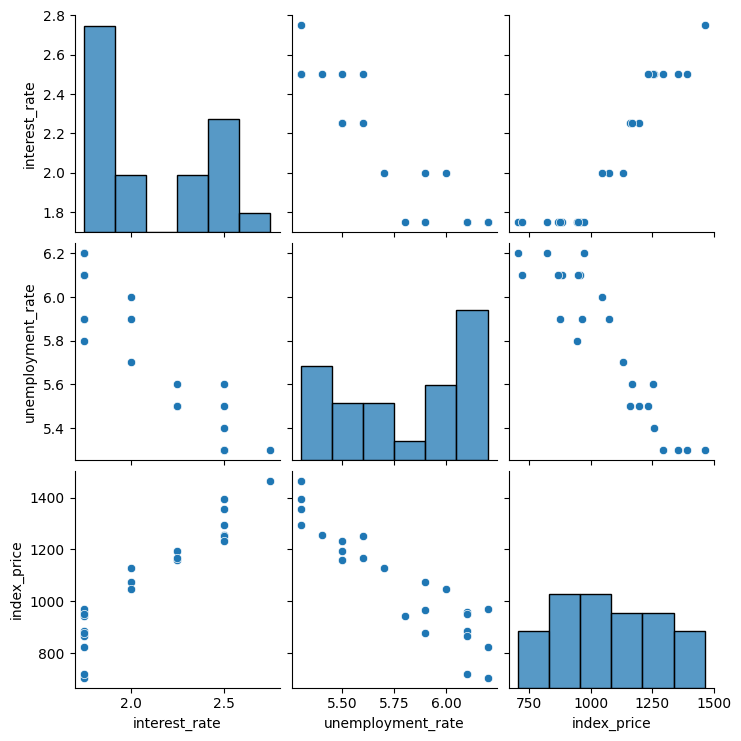

In [128]:
# visualization
import seaborn as sns
sns.pairplot(df)

In [129]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

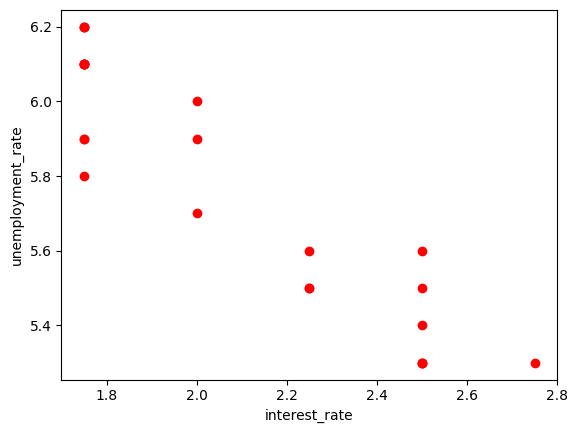

In [130]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [131]:
# independent and dependent features
X=df.iloc[:,:-1]
y = df.iloc[:,-1]

In [132]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [133]:
# train text split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [134]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

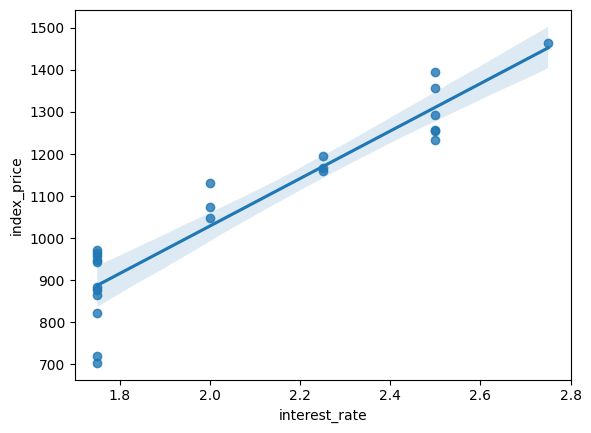

In [135]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

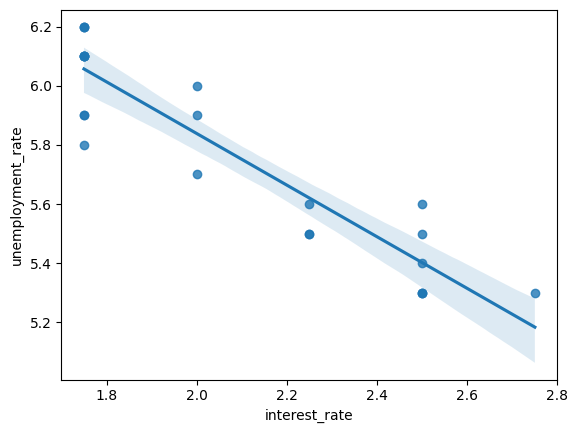

In [136]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

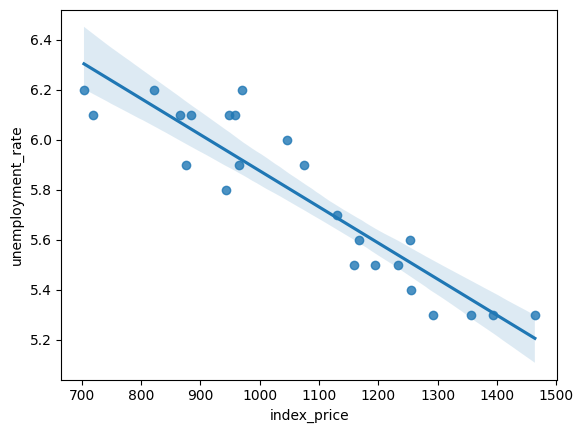

In [137]:
sns.regplot(x=df['index_price'], y=df['unemployment_rate'])

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# X_train

In [140]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [147]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [149]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
np.mean(validation_score)

np.float64(-5914.828180162388)

In [150]:
# prediction

y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [144]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  5793.762887712569
mae:  59.935781523235484
rmse:  76.11677139574805


In [145]:
# R^2 = 1-SSR/SSt
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score


0.8278978091457145

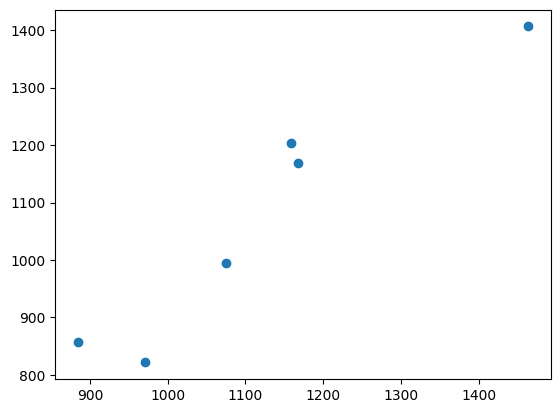

In [151]:
plt.scatter(y_test, y_pred)

In [153]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

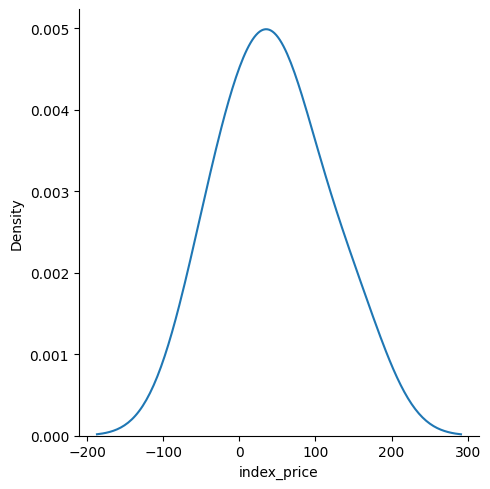

In [160]:
sns.displot(residuals, kind='kde')

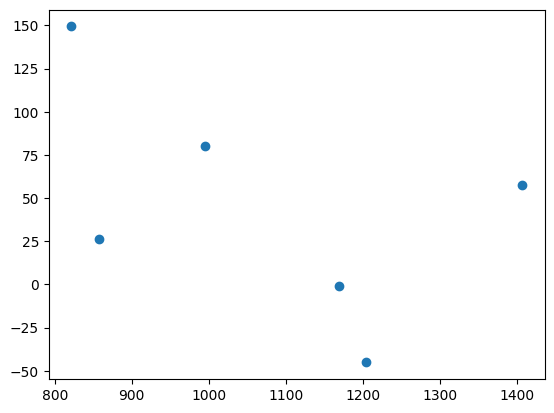

In [156]:
plt.scatter(y_pred, residuals)